Original Data:
   Index  Height_in  Weight_lb
0      1      65.78     112.99
1      2      71.52     136.49
2      3      69.40     153.03
3      4      68.22     142.34
4      5      67.79     144.30


C:\Users\zaid bagwan\AppData\Local\Temp\ipykernel_15672\556484214.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_weight_bin = df.groupby('Height_bin')['Weight'].mean().round(1)


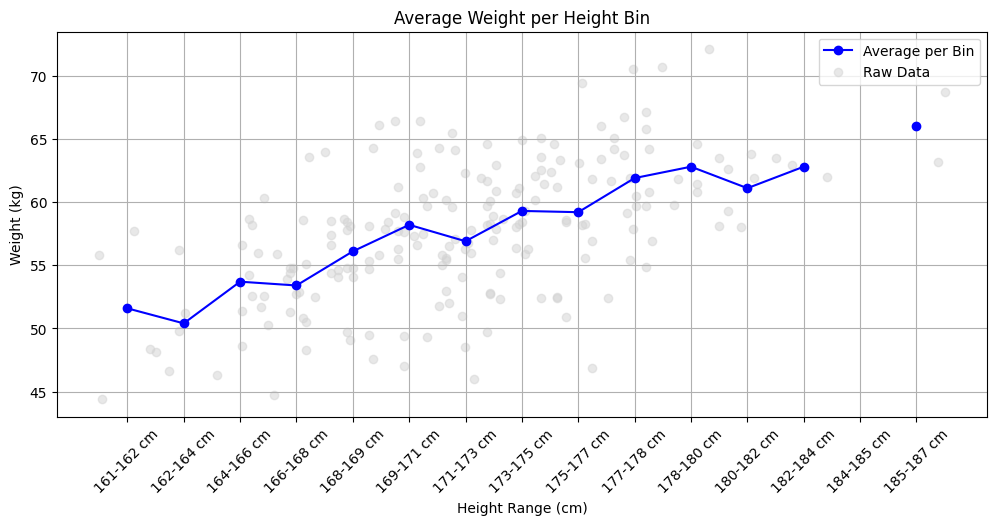

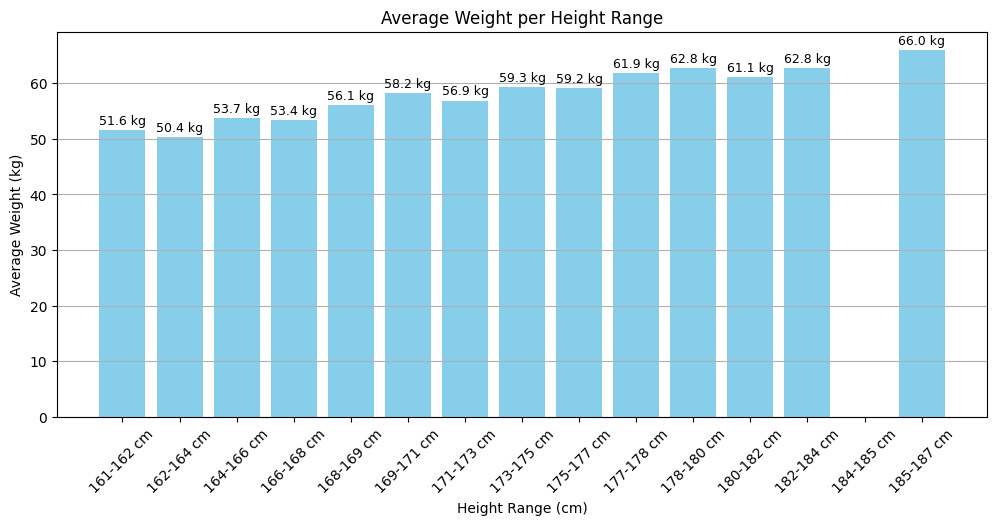

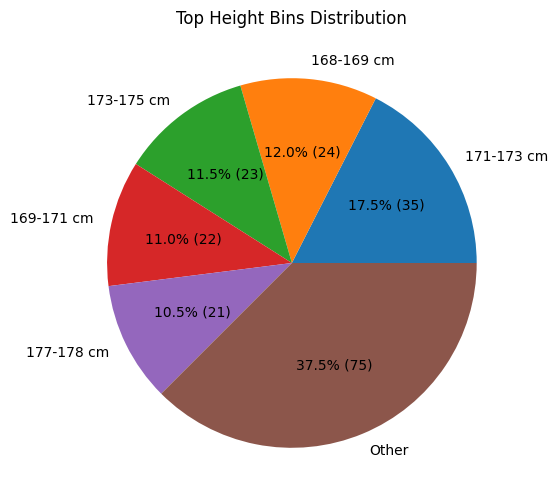

Cleaned dataset saved as cleaned_hw_200_metric.csv


In [2]:
# Project 1: Data Cleaning & Visualization (Final Professional Version)

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Dataset
df = pd.read_csv('hw_200.csv')  # replace with your CSV path
df.columns = ['Index','Height_in', 'Weight_lb']
print("Original Data:")
print(df.head())

# Step 2: Convert to Metric
df['Height'] = (df['Height_in'] * 2.54).round(1)  # inches → cm
df['Weight'] = (df['Weight_lb'] * 0.453592).round(1)  # pounds → kg
df = df[['Height', 'Weight']]

# Step 3: Clean Data
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)

# Step 4: Bin Heights for Aggregation
num_bins = 15
df['Height_bin'] = pd.cut(df['Height'], bins=num_bins)

# Average weight per bin, rounded
avg_weight_bin = df.groupby('Height_bin')['Weight'].mean().round(1)

# Numeric midpoints for line & bar charts
x_numeric = [interval.mid for interval in avg_weight_bin.index]

# Labels for X-axis
x_labels = [f"{int(interval.left)}-{int(interval.right)} cm" for interval in avg_weight_bin.index]

# Step 5: Line Chart
plt.figure(figsize=(12,5))
plt.plot(x_numeric, avg_weight_bin.values, marker='o', color='blue', label='Average per Bin')
plt.scatter(df['Height'], df['Weight'], color='lightgray', alpha=0.5, label='Raw Data')
plt.title('Average Weight per Height Bin')
plt.xlabel('Height Range (cm)')
plt.ylabel('Weight (kg)')
plt.xticks(ticks=x_numeric, labels=x_labels, rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("Line_chart.png", bbox_inches="tight")
plt.show()

# Step 6: Bar Chart (Average Weight per Bin)
plt.figure(figsize=(12,5))
bars = plt.bar(x_numeric, avg_weight_bin.values, width=(x_numeric[1]-x_numeric[0])*0.8, color='skyblue')
plt.title('Average Weight per Height Range')
plt.xlabel('Height Range (cm)')
plt.ylabel('Average Weight (kg)')
plt.xticks(ticks=x_numeric, labels=x_labels, rotation=45)
plt.grid(axis='y')

# Add numbers on top of bars
for bar, v in zip(bars, avg_weight_bin.values):
    plt.text(bar.get_x() + bar.get_width()/2, v + 0.5, f"{v} kg", ha='center', va='bottom', fontsize=9)

plt.savefig("Bar_chart.png", bbox_inches="tight")
plt.show()

# Step 7: Pie Chart (Top Height Bins)

# Count of people per Height bin
height_counts = df['Height_bin'].value_counts().sort_index()

# Take top 5 bins + combine the rest as "Other"
top_bins = height_counts.sort_values(ascending=False).head(5)
other = height_counts.sum() - top_bins.sum()
top_bins['Other'] = other

# Replace interval labels with readable text
new_labels = []
for label in top_bins.index:
    if label == 'Other':
        new_labels.append(label)
    else:
        new_labels.append(f"{int(label.left)}-{int(label.right)} cm")

# Plot pie chart with cleaned labels
top_bins.plot(
    kind='pie',
    labels=new_labels,
    autopct=lambda p: f'{p:.1f}% ({int(p*top_bins.sum()/100)})',
    figsize=(6,6)
)
plt.title('Top Height Bins Distribution')
plt.ylabel('')  # remove ylabel
plt.savefig("Pie_chart.png", bbox_inches="tight")
plt.show()

# Step 8: Export Cleaned Metric Dataset
df.to_csv('cleaned_hw_200_metric.csv', index=False)
print("Cleaned dataset saved as cleaned_hw_200_metric.csv")
